#Imports


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Network Tuning Parameters

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128
VERBOSE = 1
N_HIDDEN=128
NB_CLASSES = 10
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [ ]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
RESHAPED=784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name = 'dense_layer_1', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name = 'dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES, name = 'dense_layer_3', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
 history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs= EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
375/375 [==============================] - 4s 4ms/step - loss: 0.5146 - accuracy: 0.8422 - val_loss: 0.1805 - val_accuracy: 0.9457
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9329 - val_loss: 0.1365 - val_accuracy: 0.9596
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1763 - accuracy: 0.9477 - val_loss: 0.1188 - val_accuracy: 0.9650
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1498 - accuracy: 0.9554 - val_loss: 0.1052 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9614 - val_loss: 0.0994 - val_accuracy: 0.9704
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1159 - accuracy: 0.9651 - val_loss: 0.0949 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.0893 - val_accuracy: 0.9732
Epoch 

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest Loss:", score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9767

Test Loss: 0.07937528938055038
Test Accuracy: 0.9767000079154968


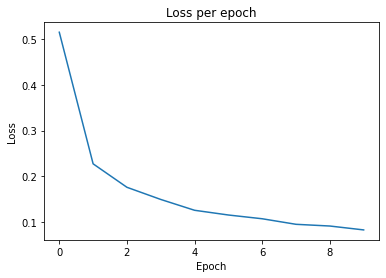

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

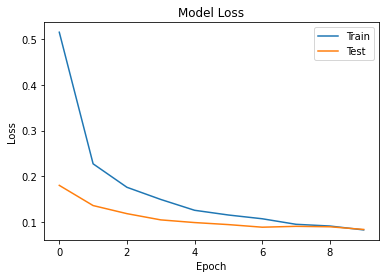

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



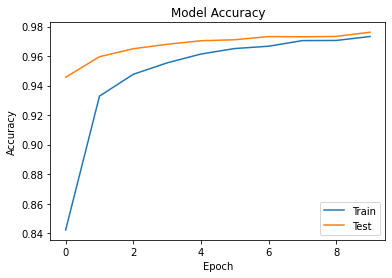

In [ ]:
plt.plot(history.history['accuracy'], label ="train_accuracy")
plt.plot(history.history['val_accuracy'], label = "test_accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 111ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 16ms/step


7

In [ ]:
Y_test = [np.argmax(label) for label in Y_test]
Y_test[0]

7

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

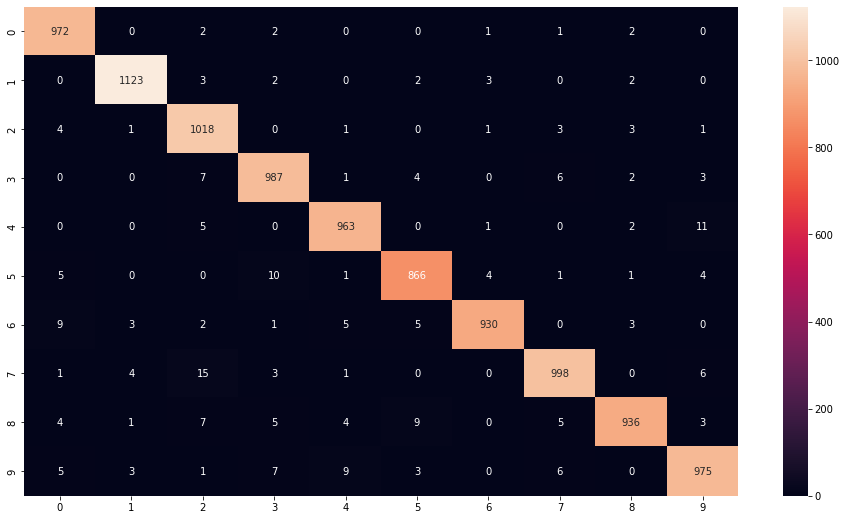

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(Y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
model.compile(optimizer = 'RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_RMSProp = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs= EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.4802 - accuracy: 0.8560 - val_loss: 0.1803 - val_accuracy: 0.9472
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9335 - val_loss: 0.1372 - val_accuracy: 0.9597
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1722 - accuracy: 0.9482 - val_loss: 0.1137 - val_accuracy: 0.9655
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1456 - accuracy: 0.9561 - val_loss: 0.1086 - val_accuracy: 0.9700
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9597 - val_loss: 0.1028 - val_accuracy: 0.9709
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1188 - accuracy: 0.9647 - val_loss: 0.1034 - val_accuracy: 0.9717
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1082 - accuracy: 0.9673 - val_loss: 0.1012 - val_accuracy: 0.9732
Epoch 

In [ ]:
score_RMSProp= model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest Loss:", score_RMSProp[0])
print('Test Accuracy:', score_RMSProp[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9766

Test Loss: 0.09319096058607101
Test Accuracy: 0.9765999913215637


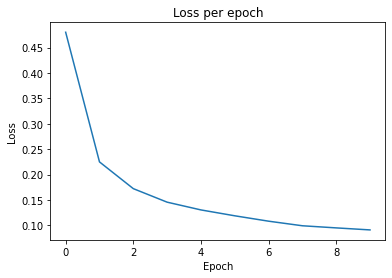

In [ ]:
plt.plot(history_RMSProp.history['loss'])
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

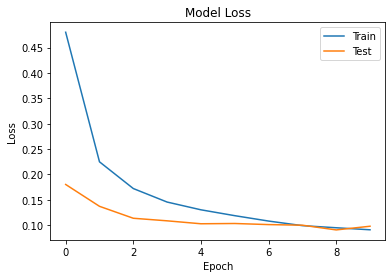

In [ ]:
plt.plot(history_RMSProp.history['loss'])
plt.plot(history_RMSProp.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

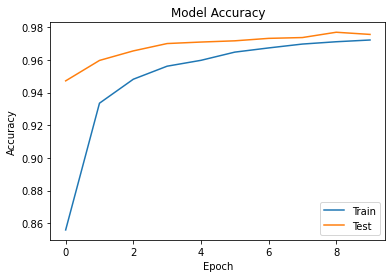

In [ ]:
plt.plot(history_RMSProp.history['accuracy'], label ="train_accuracy")
plt.plot(history_RMSProp.history['val_accuracy'], label = "test_accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()